In [1]:
# =====================================
# Title: CNN Model for CIFAR-10 Image Classification (CSV version)
# =====================================

# a. Import required packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# a. Loading and Preprocessing the Image Data
# =====================================

# Load CSV files (update file paths as needed)
train_df = pd.read_csv(r"C:\Users\\OneDrive\Desktop\DL\DLDataset\CIFRAssn2&3\train_data.csv")
test_df  = pd.read_csv(r"C:\Users\\OneDrive\Desktop\DL\DLDataset\CIFRAssn2&3\test_data.csv")


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


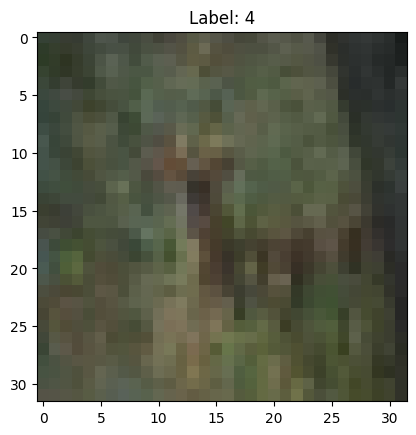

In [2]:
# Separate features (pixels) and labels
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# CIFAR-10 images are 32x32 with 3 color channels (RGB)
x_train = x_train.reshape(-1, 32, 32, 3)
x_test  = x_test.reshape(-1, 32, 32, 3)

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Display dataset info
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

# Display one sample image
plt.imshow(x_train[10])
plt.title(f"Label: {y_train[10]}")
plt.show()


In [3]:
# =====================================
# b. Defining the CNN Model Architecture
# =====================================

model = keras.Sequential([
    # Convolution + Pooling Layers
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    # Flatten + Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Show architecture
model.summary()

C:\ProgramData\anaconda3\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,146 (887.29 KB)

 Trainable params: 227,146 (887.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# =====================================
# c. Training the Model
# =====================================

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


Epoch 1/15
352/352 - 32s - 92ms/step - accuracy: 0.3615 - loss: 1.7295 - val_accuracy: 0.4716 - val_loss: 1.4266
Epoch 2/15
352/352 - 23s - 64ms/step - accuracy: 0.5163 - loss: 1.3432 - val_accuracy: 0.5732 - val_loss: 1.1928
Epoch 3/15
352/352 - 20s - 57ms/step - accuracy: 0.5755 - loss: 1.1889 - val_accuracy: 0.6210 - val_loss: 1.0716
Epoch 4/15
352/352 - 16s - 45ms/step - accuracy: 0.6175 - loss: 1.0820 - val_accuracy: 0.6406 - val_loss: 1.0179
Epoch 5/15
352/352 - 15s - 42ms/step - accuracy: 0.6515 - loss: 0.9929 - val_accuracy: 0.6698 - val_loss: 0.9470
Epoch 6/15
352/352 - 15s - 43ms/step - accuracy: 0.6768 - loss: 0.9235 - val_accuracy: 0.6914 - val_loss: 0.8858
Epoch 7/15
352/352 - 16s - 45ms/step - accuracy: 0.6990 - loss: 0.8621 - val_accuracy: 0.7066 - val_loss: 0.8515
Epoch 8/15
352/352 - 16s - 45ms/step - accuracy: 0.7166 - loss: 0.8069 - val_accuracy: 0.7030 - val_loss: 0.8498
Epoch 9/15
352/352 - 15s - 43ms/step - accuracy: 0.7346 - loss: 0.7583 - val_accuracy: 0.7072 - 

313/313 - 3s - 8ms/step - accuracy: 0.7296 - loss: 0.8008

Test Accuracy: 0.7296
Test Loss: 0.8008


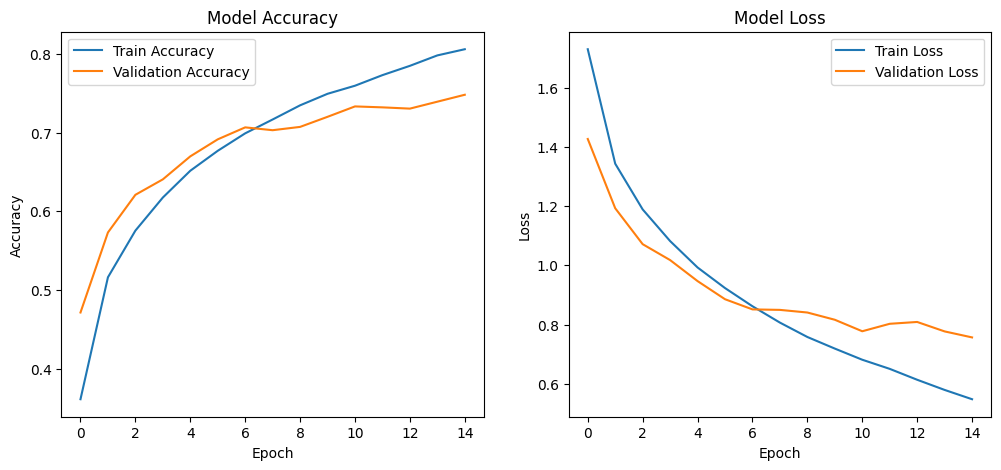

<Axes: >

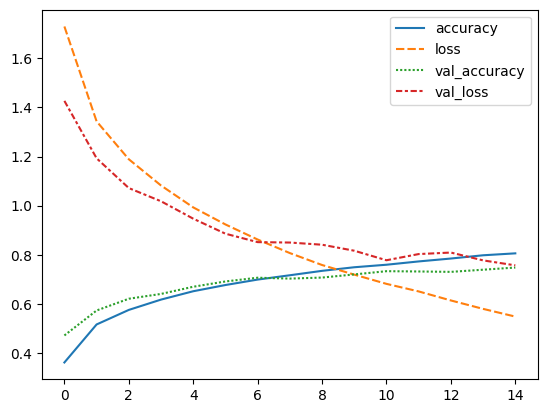

In [5]:
# =====================================
# d. Estimating the Model's Performance
# =====================================

# Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# =====================================
# e. Plot Training and Validation Results
# =====================================

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Optional seaborn summary
sns.lineplot(data=history.history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


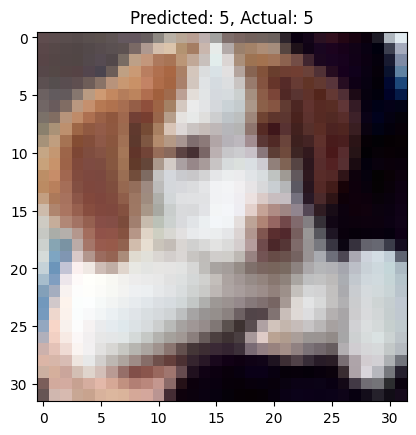

In [6]:
# =====================================
# f. Display Prediction Example
# =====================================

predictions = model.predict(x_test)
index = 16
plt.imshow(x_test[index])
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
plt.show()